<a href="https://colab.research.google.com/github/Sheik1sha/Sheik_Projects/blob/main/2024_NYC_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

nypd_data = pd.read_csv('NYPD_Arrest_Data.csv')

# Display the first few rows and column names to understand the structure
print("First few rows of the dataset:")
print(nypd_data.head())

# Check the column names and data types
#print("\nColumn names and data types:")
print(nypd_data.dtypes)

# Summary statistics of numeric columns
#print("\nSummary statistics:")
#print(nypd_data.describe())


First few rows of the dataset:
   ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   280255493  01/10/2024  397.0  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
1   279805419  01/02/2024  157.0                          RAPE 1  104.0   
2   279895750  01/03/2024  101.0                       ASSAULT 3  344.0   
3   280809090  01/19/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
4   280357135  01/11/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                       ROBBERY  PL 1601001          F           M   
1                          RAPE  PL 1303501          F           K   
2  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           Q   
3               DANGEROUS DRUGS  PL 2200300          M           B   
4                FELONY ASSAULT  PL 1200502          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0               26   

***From the summary we could see there is a mismatch in the count of the records, There are some missing values in columns like PD_CD, KY_CD, and Longitude.***






In [21]:
# Convert ARREST_DATE to datetime format
nypd_data['ARREST_DATE'] = pd.to_datetime(nypd_data['ARREST_DATE'], format='%m/%d/%Y', errors='coerce')

# Drop rows with missing values in critical columns
nypd_data_cleaned = nypd_data.dropna(subset=['PD_CD', 'KY_CD'])

# Check the columns in the cleaned dataset
print("\nColumns in cleaned dataset:")
print(nypd_data_cleaned.columns)

# Summary statistics after cleaning
print("\nSummary statistics after cleaning:")
print(nypd_data_cleaned.describe())






Columns in cleaned dataset:
Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

Summary statistics after cleaning:
         ARREST_KEY                    ARREST_DATE         PD_CD  \
count  6.361200e+04                          63612  63612.000000   
mean   2.822203e+08  2024-02-14 18:53:15.925297152    440.382648   
min    2.797635e+08            2024-01-01 00:00:00      2.000000   
25%    2.810329e+08            2024-01-24 00:00:00    139.000000   
50%    2.822323e+08            2024-02-14 00:00:00    414.000000   
75%    2.834321e+08            2024-03-08 00:00:00    705.000000   
max    2.846252e+08            2024-03-31 00:00:00    973.000000   
std    1.387826e+06                            NaN    274.534676   



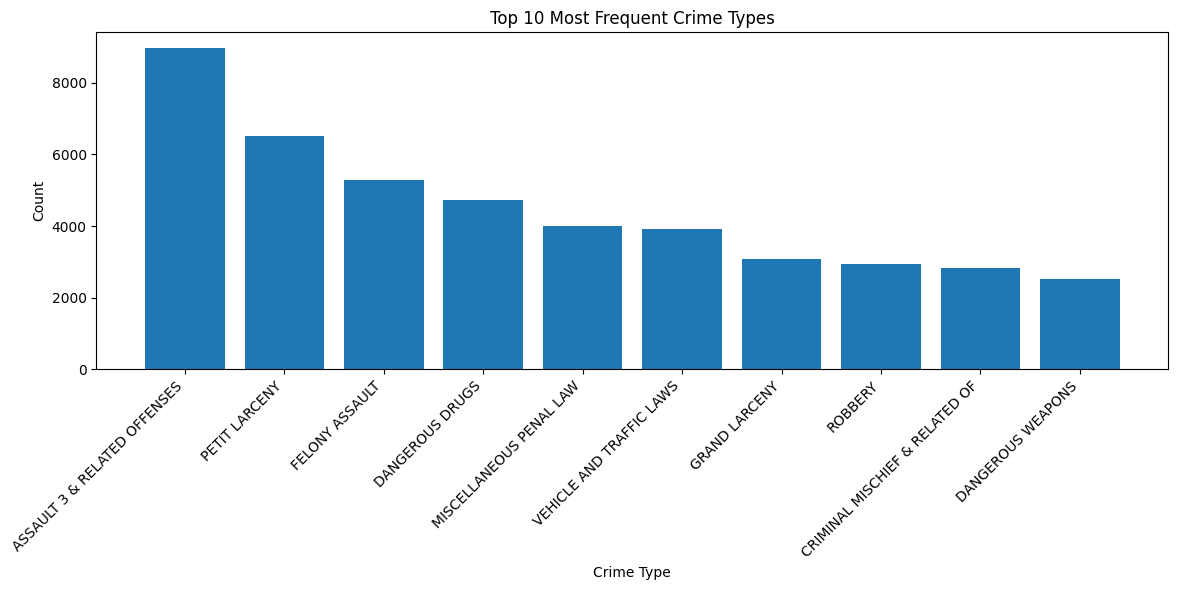

In [22]:
# Plot a bar chart of top 10 most frequent crime types
plt.figure(figsize=(12, 6))
crime_counts = nypd_data_cleaned['OFNS_DESC'].value_counts().head(10)
plt.bar(crime_counts.index, crime_counts.values)
plt.title('Top 10 Most Frequent Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<ipython-input-23-bbfd15034394>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_data_cleaned['Offense Level'] = nypd_data_cleaned['LAW_CAT_CD'].map(offense_labels)


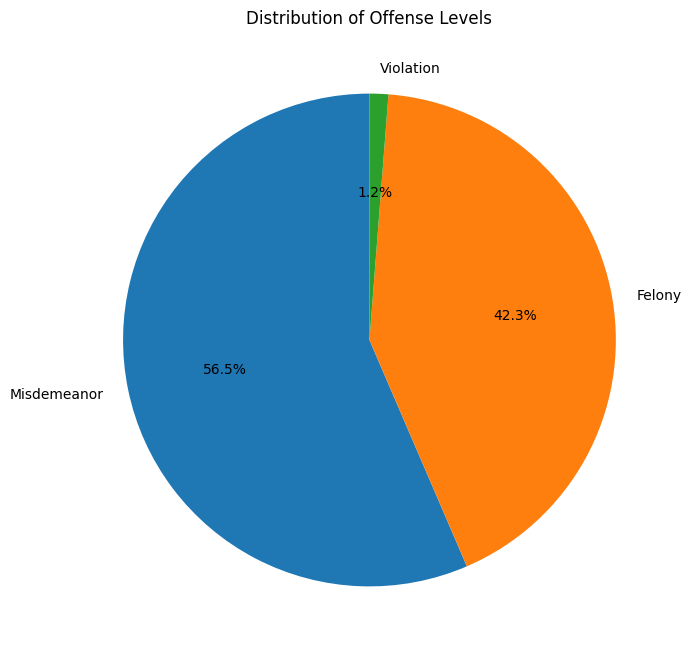

In [23]:
# Map offense categories to meaningful labels
offense_labels = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation'
}

# Replace LAW_CAT_CD with mapped labels
nypd_data_cleaned['Offense Level'] = nypd_data_cleaned['LAW_CAT_CD'].map(offense_labels)

# Plot a pie chart of offense categories with mapped labels
plt.figure(figsize=(8, 8))
nypd_data_cleaned['Offense Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Offense Levels')
plt.ylabel('')
plt.show()



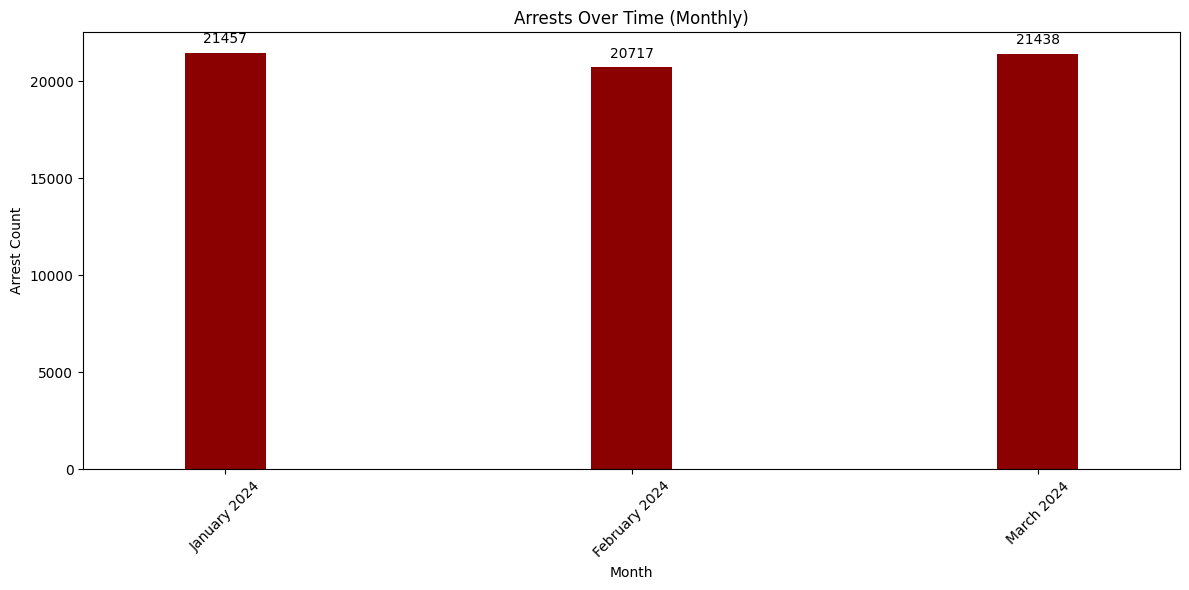

In [24]:
# Arrests over time
plt.figure(figsize=(12, 6))
monthly_counts = nypd_data_cleaned['ARREST_DATE'].dt.to_period('M').value_counts().sort_index()
ax = monthly_counts.plot(kind='bar', color='darkred', width=0.2)
plt.title('Arrests Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Arrest Count')

# Format x-axis to display month names
ax.set_xticklabels(monthly_counts.index.strftime('%B %Y'))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-25-53145e5cbe28>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_data_cleaned['AGE_GROUP_MAPPED'] = nypd_data_cleaned['AGE_GROUP'].apply(map_age_group)


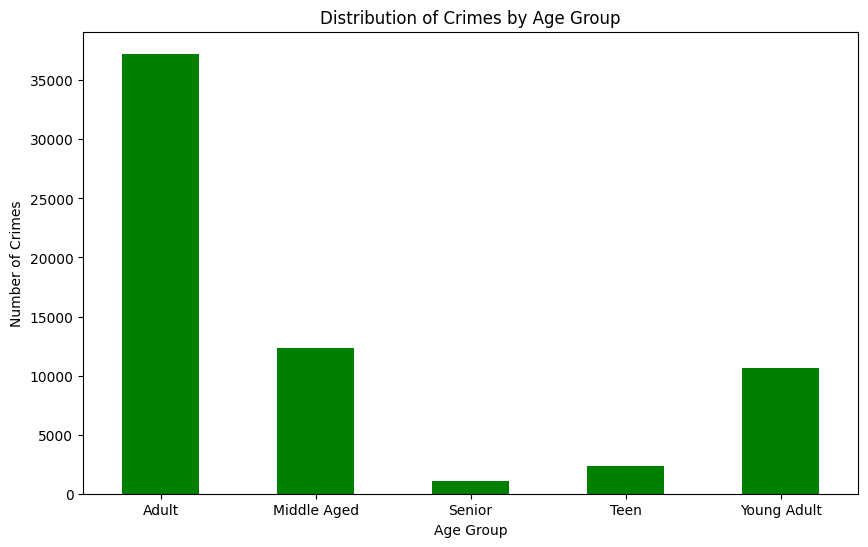

In [25]:

#Mapping function to categorize age groups into five categories
def map_age_group(age):
    if age == '<18':
        return 'Teen'
    elif age == '18-24':
        return 'Young Adult'
    elif age == '25-44':
        return 'Adult'
    elif age == '45-64':
        return 'Middle Aged'
    elif age == '65+':
        return 'Senior'
    else:
        return 'Unknown'

# Apply mapping function to create a new column 'AGE_GROUP_MAPPED'
nypd_data_cleaned['AGE_GROUP_MAPPED'] = nypd_data_cleaned['AGE_GROUP'].apply(map_age_group)

# Plotting crime distribution by mapped age group
plt.figure(figsize=(10, 6))
nypd_data_cleaned['AGE_GROUP_MAPPED'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()


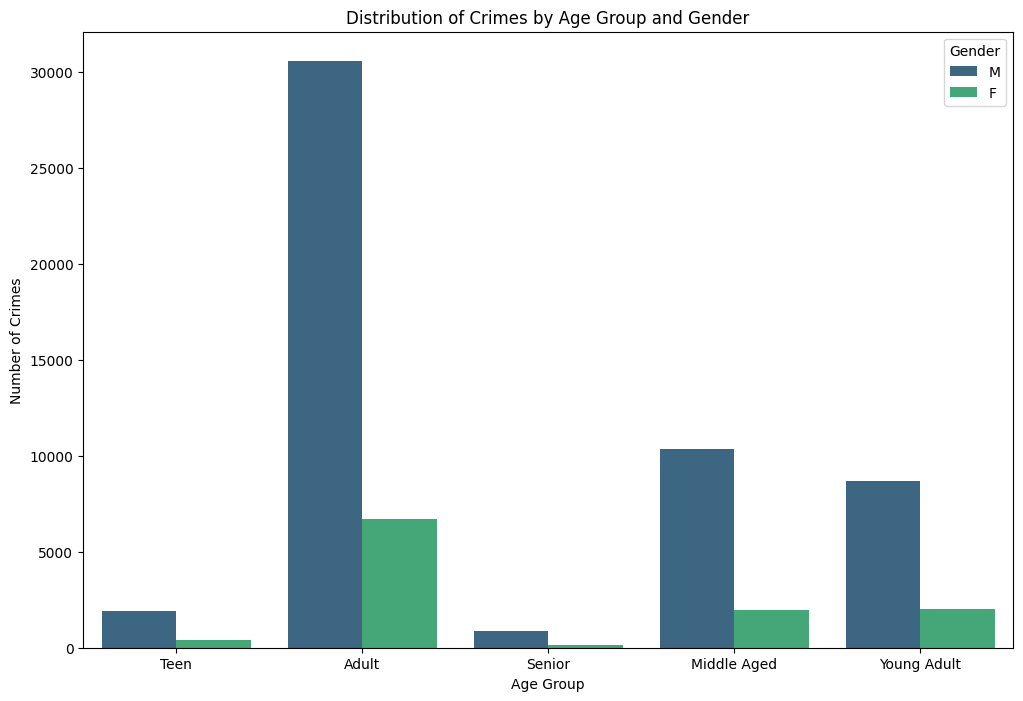

In [26]:
# Plotting crime distribution by age group and gender
plt.figure(figsize=(12, 8))
sns.countplot(data=nypd_data_cleaned, x='AGE_GROUP_MAPPED', hue='PERP_SEX', palette='viridis')
plt.title('Distribution of Crimes by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()